## Heart Disease Prediction Using Machine Learning on Clinical Parameters

### Project Overview
- In this project, as a Data Scientist at a pharmaceutical company specializing in heart disease medications, our task is to develop a predictive model that can accurately determine whether a patient is likely to have heart disease based on various clinical parameters. Given the critical nature of early diagnosis in heart disease, this project aims to leverage machine learning techniques to assist healthcare professionals in making informed decisions about patient care.

**Clinical Parameters**
The dataset provided for this project includes thirteen clinical parameters that are crucial indicators of heart health:
- Age: The patient’s age in years.
- Sex: The gender of the patient (1 = male; 0 = female).
- Chest Pain Type (cp):
 - 0: Typical angina (chest pain related to decreased blood supply to the heart).
 - 1: Atypical angina (chest pain not related to the heart).
 - 2: Non-anginal pain (typically esophageal spasms, non-heart related).
 - 3: Asymptomatic (no chest pain).
- Resting Blood Pressure (trtbps): The patient’s resting blood pressure in mm Hg. Blood pressure above 130-140 mm Hg is typically a cause for concern.
- Serum Cholesterol (chol): The total cholesterol level in mg/dl. Levels above 200 mg/dl are considered concerning.
- Fasting Blood Sugar (fbs): Indicates if the patient’s fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false). A level above 126 mg/dl signals diabetes.
- Resting Electrocardiographic Results (restecg):
 - 0: Normal.
 - 1: ST-T wave abnormality (range from mild symptoms to severe problems, indicating a non-normal heartbeat).
 - 2: Possible or definite left ventricular hypertrophy (enlarged heart’s main pumping chamber).
- Maximum Heart Rate Achieved (thalachh): The maximum heart rate achieved by the patient.
- Exercise Induced Angina (exng): Whether exercise induced angina occurs (1 = yes; 0 = no).
- ST Depression (oldpeak): ST depression induced by exercise relative to rest, which indicates the stress level on the heart during exercise.
- Slope of Peak Exercise ST Segment (slp):
 - 0: Upsloping (better heart rate response with exercise, uncommon).
 - 1: Flatsloping (minimal change, typical healthy heart).
 - 2: Downsloping (signs of an unhealthy heart).
- Number of Major Vessels Colored by Fluoroscopy (caa): The number of major vessels (0-3) colored by fluoroscopy. More colored vessels indicate better blood flow and no clots.
- Thalium Stress Test Result (thall):
 - 1,3: Normal.
 - 6: Fixed defect (previous defect but now resolved).
 - 7: Reversible defect (impaired blood movement during exercise).

### Objective
- The objective of this project is to build a machine learning model that can predict the likelihood of heart disease (output = 1 for yes, 0 for no) based on the above clinical parameters. The model will be evaluated for accuracy, precision, recall, and other relevant metrics to ensure its reliability and effectiveness in a real-world healthcare setting.

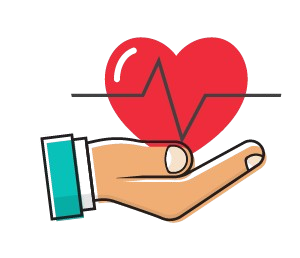

### Importing the recquired libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from math import sqrt
import seaborn as sns
from sklearn.metrics import classification_report

#### Importing the dataset

In [8]:
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
#Rename the column to get the clear view of columns

In [9]:
df.rename(columns={'cp':'Chest_Pain','trestbps':'Resting_Blood_Pressure','chol':'Serum_Cholestoral','fbs':'Fasting_Blood_Sugar','restecg':'Resting_Electrocardiographic','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina','slope':'Slope_Of_Peak','thal':'Thalium_Stress_Result'},inplace=True)

In [13]:
#Last five rows

In [12]:
df.tail()

,age,sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,Slope_Of_Peak,ca,Thalium_Stress_Result,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [14]:
df.shape

(1025, 14)

In [15]:
#There are 1025 rows and 14 columns

In [18]:
#description of the dataset.
df.describe()

,age,sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,Slope_Of_Peak,ca,Thalium_Stress_Result,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [21]:
#There are 713 male and 312 female present.

In [22]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [23]:
#there are 526 people has heart attack and 499 people dont have heart attack.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1025 non-null   int64  
 1   sex                           1025 non-null   int64  
 2   Chest_Pain                    1025 non-null   int64  
 3   Resting_Blood_Pressure        1025 non-null   int64  
 4   Serum_Cholestoral             1025 non-null   int64  
 5   Fasting_Blood_Sugar           1025 non-null   int64  
 6   Resting_Electrocardiographic  1025 non-null   int64  
 7   Max_Heart_Rate                1025 non-null   int64  
 8   Exercise_Induced_Angina       1025 non-null   int64  
 9   oldpeak                       1025 non-null   float64
 10  Slope_Of_Peak                 1025 non-null   int64  
 11  ca                            1025 non-null   int64  
 12  Thalium_Stress_Result         1025 non-null   int64  
 13  tar

### Checking for null values

In [25]:
df.isnull().sum()

age                             0
sex                             0
Chest_Pain                      0
Resting_Blood_Pressure          0
Serum_Cholestoral               0
Fasting_Blood_Sugar             0
Resting_Electrocardiographic    0
Max_Heart_Rate                  0
Exercise_Induced_Angina         0
oldpeak                         0
Slope_Of_Peak                   0
ca                              0
Thalium_Stress_Result           0
target                          0
dtype: int64

In [26]:
#There are no null values present

In [30]:
print("No of rows in a data :-",df.shape[0])
print("No of columns in data :-",df.shape[1])

No of rows in a data :- 1025
No of columns in data :- 14


In [32]:
#columns in dataset
df.columns

Index(['age', 'sex', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholestoral', 'Fasting_Blood_Sugar',
       'Resting_Electrocardiographic', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'oldpeak', 'Slope_Of_Peak', 'ca',
       'Thalium_Stress_Result', 'target'],
      dtype='object')

In [31]:
#Creating a copy of data
df1=df.copy()

## Exploratory Data Analysis

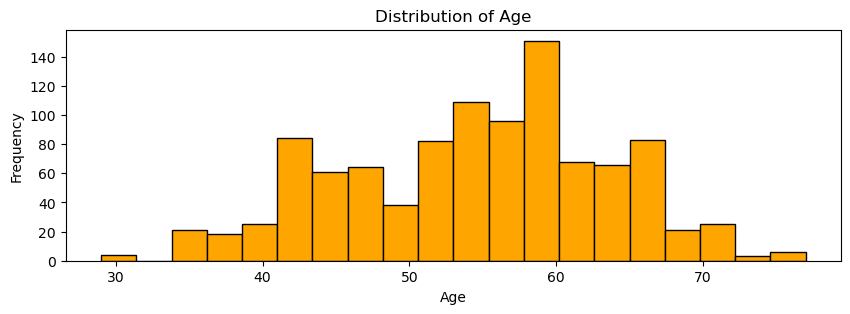

In [37]:
import matplotlib.pyplot as plt
# Histogram for 'age'
plt.figure(figsize=(10, 3))
plt.hist(df['age'], bins=20, edgecolor='black',color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observation**
- Dataset contains more number of peoples present in between age 40-70.
- Least number of entries present below age 30.

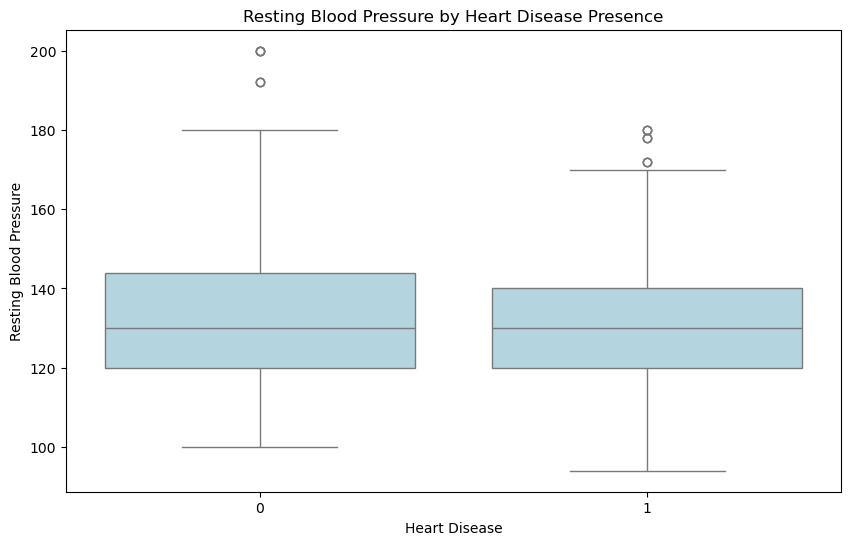

In [39]:
# Box plot for 'Resting_Blood_Pressure' by 'target'
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Resting_Blood_Pressure', data=df,color='lightblue')
plt.title('Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()

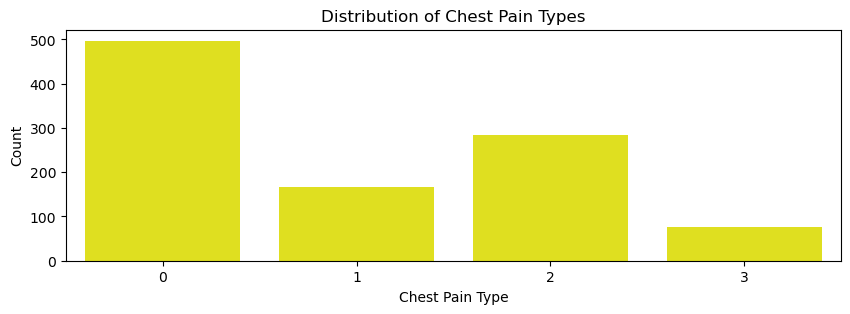

In [43]:
# Bar plot for 'Chest_Pain'
plt.figure(figsize=(10, 3))
sns.countplot(x='Chest_Pain', data=df,color='yellow')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**Observations**
- There are 450+ peoples are having Typical angina chest pain (0)
- There are 150+ peoples are having Atypical angina chest pain (1)
- There are 250+ peoples are having Non-anginal pain chest pain (2)
- There are  50+ peoples are having Asymptomatic angina  means no chest pain (3)

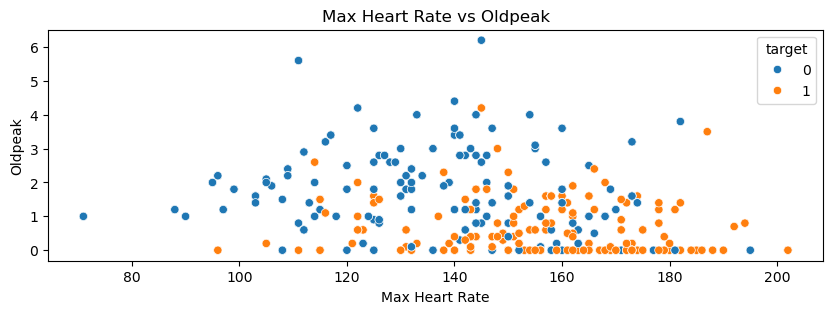

In [45]:
# Scatter plot for 'Max_Heart_Rate' vs 'oldpeak'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Max_Heart_Rate', y='oldpeak', hue='target', data=df)
plt.title('Max Heart Rate vs Oldpeak')
plt.xlabel('Max Heart Rate')
plt.ylabel('Oldpeak')
plt.show()

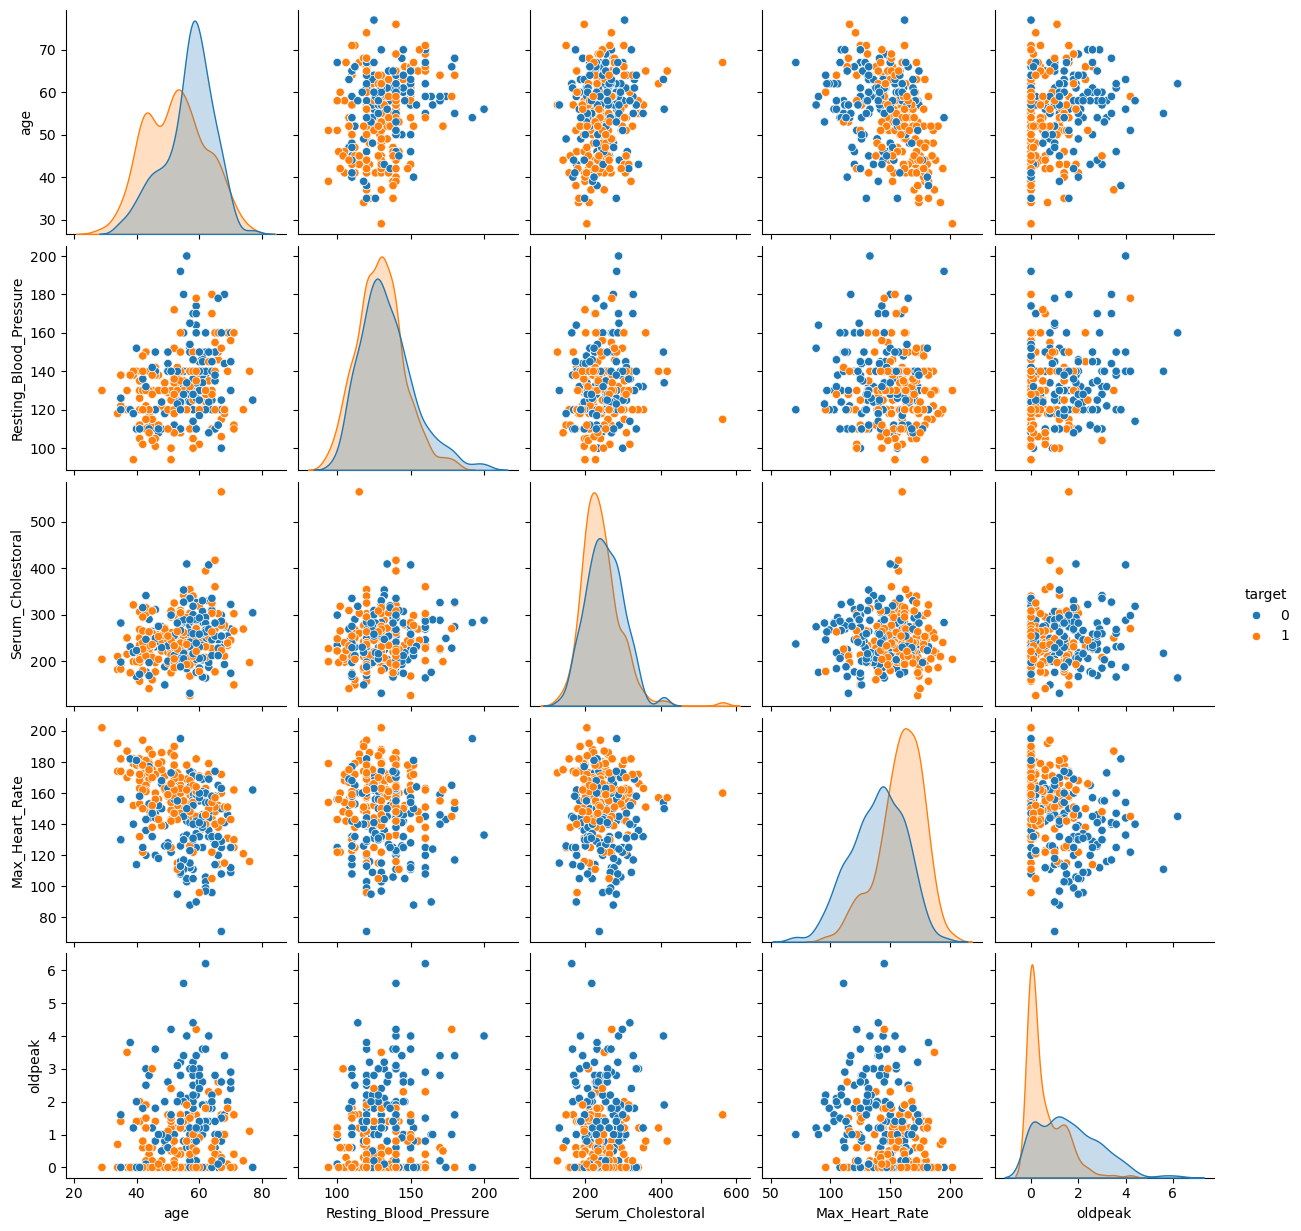

In [49]:
# Pair plot with hue for 'target'
sns.pairplot(df, hue='target', vars=['age', 'Resting_Blood_Pressure', 'Serum_Cholestoral', 'Max_Heart_Rate', 'oldpeak'])
plt.show()

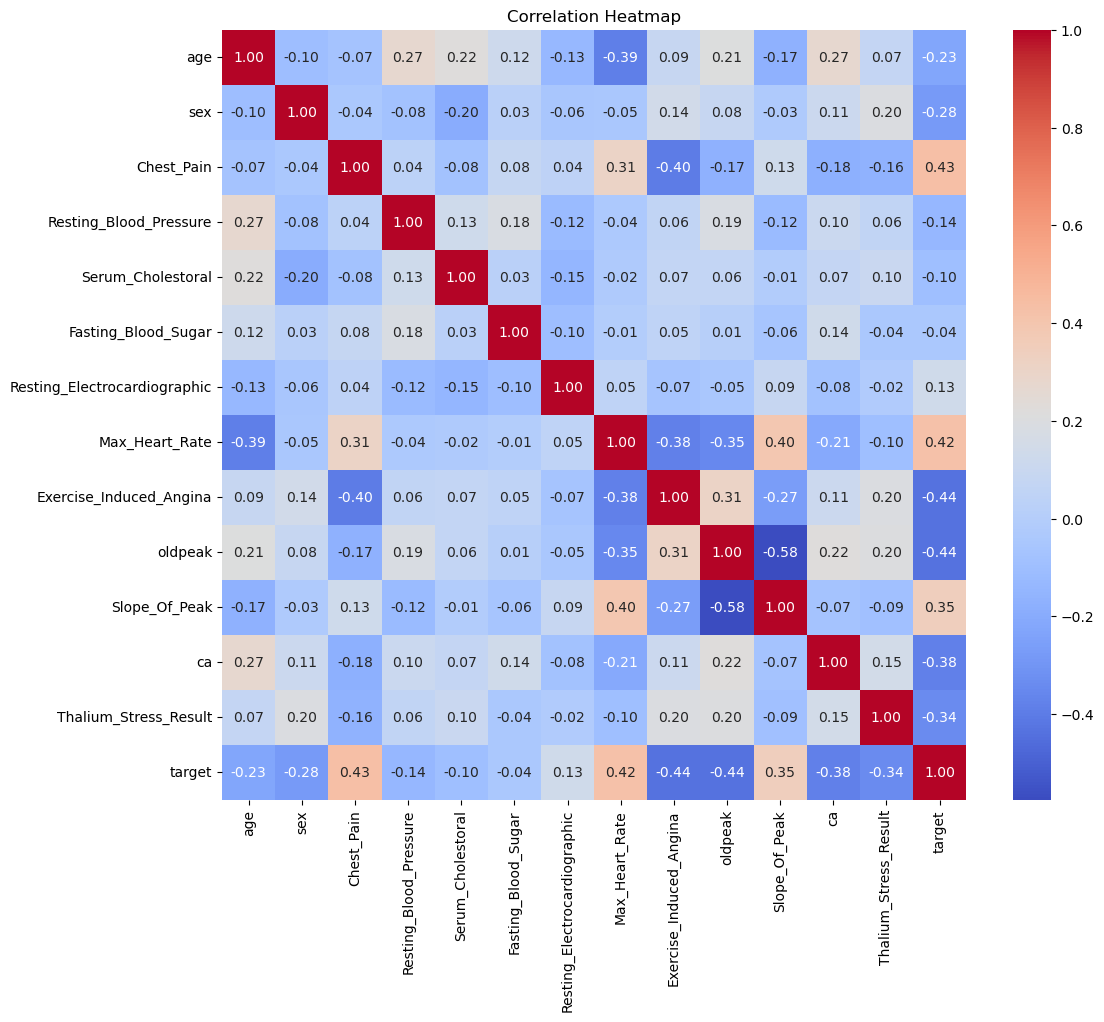

In [50]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

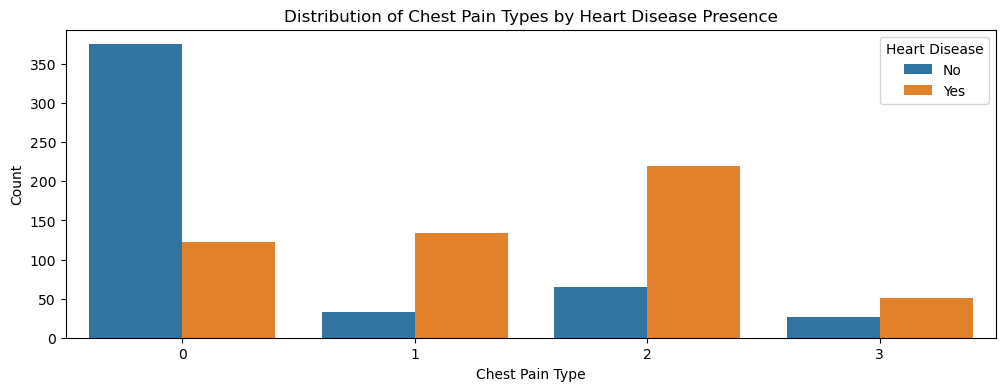

In [52]:
# Bar plot for 'Chest_Pain' vs 'target'
plt.figure(figsize=(12, 4))
sns.countplot(x='Chest_Pain', hue='target', data=df)
plt.title('Distribution of Chest Pain Types by Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

**Observations**
- Typical angina chest pain
 - There are 100+ peoples have heart disease.
 - There are 350+ peoples don't have heart disease.
- Atypical angina
 - There are 120+ peoples have heart disease.
 - There are 30+ peoples don't have heart disease.
- Non-anginal pain
 - There are 200+ peoples have heart disease.
 - There are 50+ peoples don't have heart disease.
- Asymptomatic angina
 - There are 30+ peoples have heart disease.
 - There are 10+ peoples don't have heart disease

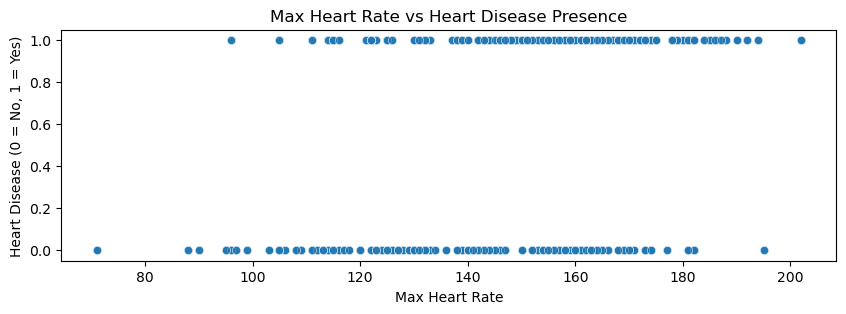

In [57]:
# Scatter plot for 'Max_Heart_Rate' vs 'target'
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Max_Heart_Rate', y='target', data=df, alpha=0.7)
plt.title('Max Heart Rate vs Heart Disease Presence')
plt.xlabel('Max Heart Rate')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()

**Observation**
- We can see that the majority of peoples who are having heart diesese has maximum heart rate 140+

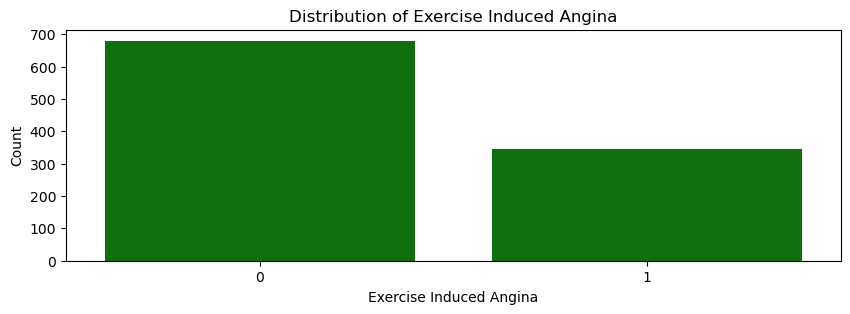

In [60]:
# Count plot for 'Exercise_Induced_Angina'
plt.figure(figsize=(10, 3))
sns.countplot(x='Exercise_Induced_Angina', data=df,color='green')
plt.title('Distribution of Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.show()

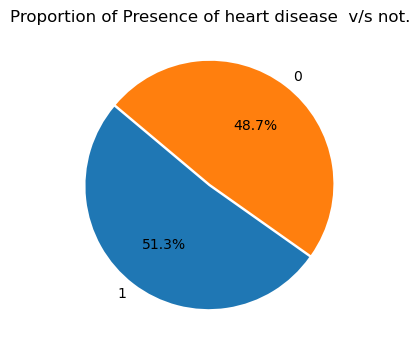

In [64]:
#Proportion of Presence of heart disease  v/s not.
explode=[0.02,0]
class_counts = df['target'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'], explode=explode)
plt.title('Proportion of Presence of heart disease  v/s not.')
plt.show()

**Observation**
- There are 48.7% people in dataset don't have heart disease.
- There are 51.3% people in dataset have heart disease.

## Data Manipulation

In [65]:
df.head()

,age,sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,Slope_Of_Peak,ca,Thalium_Stress_Result,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
df.dtypes

age                               int64
sex                               int64
Chest_Pain                        int64
Resting_Blood_Pressure            int64
Serum_Cholestoral                 int64
Fasting_Blood_Sugar               int64
Resting_Electrocardiographic      int64
Max_Heart_Rate                    int64
Exercise_Induced_Angina           int64
oldpeak                         float64
Slope_Of_Peak                     int64
ca                                int64
Thalium_Stress_Result             int64
target                            int64
dtype: object

#### Splitting data into X and Y

In [70]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [71]:
X.shape

(1025, 13)

In [72]:
y.shape

(1025,)

## Principal Component Analysis

In [73]:
#reduce the data and also preserve  highly  corelated datas.
from sklearn.decomposition import PCA
pca1=PCA(n_components=8)
X1=pca1.fit_transform(X)

In [74]:
pca1.explained_variance_ratio_

array([7.45309312e-01, 1.51991744e-01, 8.49275120e-02, 1.65008210e-02,
       3.93671051e-04, 2.78867029e-04, 2.34619083e-04, 1.02861340e-04])

In [75]:
total_data=sum(pca1.explained_variance_ratio_) 
print(" Model has successfully captured ",round(total_data,2)*100,'% of data')

 Model has successfully captured  100.0 % of data


#### Splitting data into training and testing

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=60)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [79]:
#Model training

In [80]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

svc=SVC()
svc.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
#predicting on test data

In [82]:
y_pred1=lr.predict(X_test)
y_pred2=knn.predict(X_test)
y_pred3=svc.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=rf.predict(X_test)

In [83]:
#Evaluating algorithms
print("Accuracy of LogisticRegression :-",accuracy_score(y_test,y_pred1))
print("Accuracy of KNeighborsClassifier :-",accuracy_score(y_test,y_pred2))
print("Accuracy of SVC :-",accuracy_score(y_test,y_pred3))
print("Accuracy of DecisionTreeClassifier :-",accuracy_score(y_test,y_pred4))
print("Accuracy of RandomForestClassifier :-",accuracy_score(y_test,y_pred5))

Accuracy of LogisticRegression :- 0.8409090909090909
Accuracy of KNeighborsClassifier :- 0.711038961038961
Accuracy of SVC :- 0.672077922077922
Accuracy of DecisionTreeClassifier :- 0.9805194805194806
Accuracy of RandomForestClassifier :- 0.9902597402597403


In [84]:
#Evaluating algorithms
print("Accuracy of LogisticRegression :-",(accuracy_score(y_test,y_pred1))*100)
print("Accuracy of KNeighborsClassifier :-",(accuracy_score(y_test,y_pred2))*100)
print("Accuracy of SVC :-",(accuracy_score(y_test,y_pred3))*100)
print("Accuracy of DecisionTreeClassifier :-",(accuracy_score(y_test,y_pred4))*100)
print("Accuracy of RandomForestClassifier :-",(accuracy_score(y_test,y_pred5))*100)

Accuracy of LogisticRegression :- 84.0909090909091
Accuracy of KNeighborsClassifier :- 71.1038961038961
Accuracy of SVC :- 67.20779220779221
Accuracy of DecisionTreeClassifier :- 98.05194805194806
Accuracy of RandomForestClassifier :- 99.02597402597402


In [85]:
#random forest gives the best result
#Save the model
rf_model=RandomForestClassifier()
rf_model.fit(X1,y)

RandomForestClassifier()

In [86]:
import joblib

In [88]:
joblib.dump(rf_model,"Heart Disease")

['Heart Disease']

In [89]:
model=joblib.load("Heart Disease")

In [90]:
### Prediction

In [91]:
#Predicting the model using different inputs

In [92]:
df.head()

,age,sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,Slope_Of_Peak,ca,Thalium_Stress_Result,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
p=model.predict(pca1.transform([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]))

In [94]:
if p[0]==1:
    print("Person has Heart Disease")
elif p[0]==0:
    print("No Heart Disease")

No Heart Disease


In [99]:
p=model.predict(pca1.transform([[50,0,0,110,254,0,0,159,0,0.0,2,0,2]]))

In [100]:
if p[0]==1:
    print("Person has Heart Disease")
elif p[0]==0:
    print("No Heart Disease")

Person has Heart Disease


In [95]:
df.tail()

,age,sex,Chest_Pain,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,oldpeak,Slope_Of_Peak,ca,Thalium_Stress_Result,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
